`Firefly` (https://www.icg.port.ac.uk/firefly/) is one of the
spectral fitting codes I would like to include in the project. 
To test any of the fitting codes, I will run it on source 
spectra forward modeled from galaxy formation models. 


__In this notebook__ I test `Firefly` out on Rita's L-Gal source
spectra. 

In [1]:
import numpy as np 
from astropy.io import fits
from astropy import units as U
from astropy import constants as Const
import astropy.cosmology as co
# -- firefly -- 
import GalaxySpectrumFIREFLY as gs
import StellarPopulationModel as spm
from firefly_dust import get_dust_radec
# -- FOMOspec -- 
from FOMOspec import util as UT
from FOMOspec import spectra as Spec
from FOMOspec import fitters as Fitters

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
def SpecInput(galid): 
    f_name = 'gal_spectrum_'+str(galid)+'_BGS_template_BC03_Stelib.fits'
    f_inspec = ''.join([UT.dat_dir(), 'Lgal/templates/', f_name])
    specin = fits.open(f_inspec)[1].data
    output = {}
    output['wave'] = specin['wave']
    output['flux'] = specin['flux_dust_nonoise'] * 1e-4 * 1e7 *1e17 #from W/A/m2 to 10e-17 erg/s/A/cm2
    output['flux_dust_nonoise'] = specin['flux_dust_nonoise'] * 1e-4 * 1e7 *1e17 
    output['flux_nodust_nonoise'] = specin['flux_nodust_nonoise'] * 1e-4 * 1e7 *1e17
    return output

Text(0,0.5,'flux [$10^{-17} erg/s/\\AA/cm^2$]')

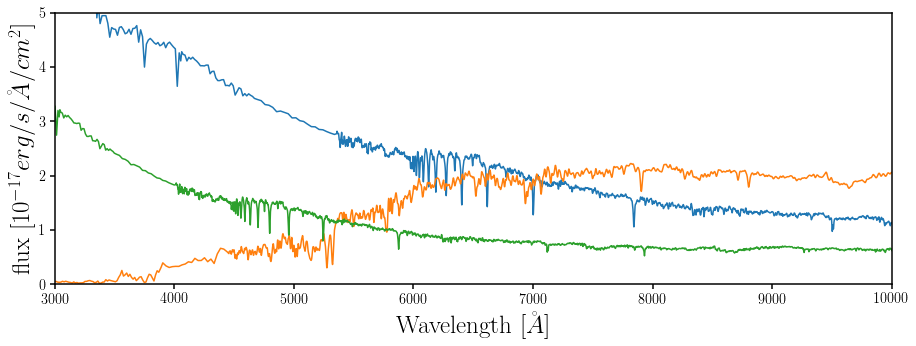

In [4]:
fig = plt.figure(figsize=(15,5)) 
sub = fig.add_subplot(111)
for idd in [101314, 253044, 10924]: 
    spec_in = SpecInput(idd)
    sub.plot(spec_in['wave'], spec_in['flux_dust_nonoise'])
sub.set_xlim([3e3, 1e4])
sub.set_xlabel('Wavelength [$\AA$]', fontsize=25)
sub.set_ylim([0., 5])
sub.set_ylabel('flux [$10^{-17} erg/s/\AA/cm^2$]', fontsize=25)

In [5]:
def firefly_bestfit(galid): 
    speci = SpecInput(galid)
    gspec = Spec.GSfirefly()
    gspec.generic(speci['wave'], speci['flux'])
    gspec.path_to_spectrum = UT.dat_dir()
    
    firefly = Fitters.Firefly(gspec,
                          None, # output file 
                          co.Planck13, # comsology
                          models = 'm11', # model ('m11', 'bc03', 'm09') 
                          model_libs = ['MILES'], # model library for M11
                          imfs = ['cha'], # IMF used ('ss', 'kr', 'cha')
                          hpf_mode = 'on', # uses HPF to dereden the spectrum                       
                          age_limits = [0, 15], 
                          Z_limits = [-3., 5.], 
                          wave_limits = [3350., 9000.], 
                          suffix="_SPM-MILES.fits", 
                          downgrade_models = False, 
                          data_wave_medium = 'vacuum', 
                          use_downgraded_models = False, 
                          write_results = False)
    bestfit = firefly.fit_models_to_data()
    return bestfit

/Users/chang/projects/firefly_release/python/firefly_library.py:291: RuntimeWarning: divide by zero encountered in double_scalars
  mass_factor[m] 			= data_norm/model_norm[m]
/Users/chang/projects/firefly_release/python/firefly_library.py:292: RuntimeWarning: invalid value encountered in true_divide
  normed_model_flux[m] 	= model_flux[m] / model_norm[m] * data_norm
/Users/chang/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:2637: RuntimeWarning: invalid value encountered in greater
  c = c[(c > critlower) & (c < critupper)]
/Users/chang/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:2637: RuntimeWarning: invalid value encountered in less
  c = c[(c > critlower) & (c < critupper)]
/Users/chang/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/chang/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide

Text(0,0.5,'flux [$10^{-17} erg/s/\\AA/cm^2$]')

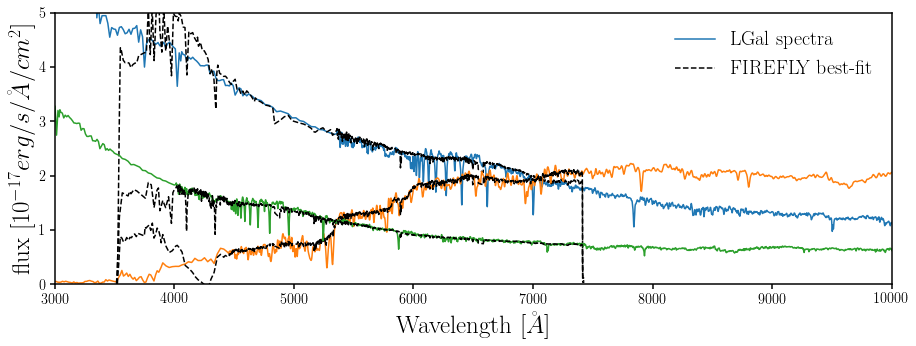

In [6]:
fig = plt.figure(figsize=(15,5)) 
sub = fig.add_subplot(111)
for ii, idd in enumerate([101314, 253044, 10924]): 
    spec_in = SpecInput(idd)
    sub.plot(spec_in['wave'], spec_in['flux_dust_nonoise'], c='C'+str(ii), label='LGal spectra')
    #w, firefly_fit = firefly_bestfit(idd)
    firefly_fit = firefly_bestfit(idd)
    sub.plot(firefly_fit['wavelength'], firefly_fit['flux_bestfit'], c='k', ls='--', label='FIREFLY best-fit')
    if ii == 0: 
        sub.legend(loc='upper right', fontsize=20)
sub.set_xlim([3e3, 1e4])
sub.set_xlabel('Wavelength [$\AA$]', fontsize=25)
sub.set_ylim([0., 5])
sub.set_ylabel('flux [$10^{-17} erg/s/\AA/cm^2$]', fontsize=25)

`FIREFLY` best-fit to LGal source spectra